In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import utils

In [2]:
df_cc = pd.read_csv("data/intents-tais-11-10-2018.csv")

### Contagem da quantidade de intenções

In [3]:
print("número de intents: ", df_cc.groupby('intent').count().shape[0])

número de intents:  35


### Intenções X número de exemplos de usuário

In [4]:
grouped_cc = df_cc.groupby('intent').count().sort_values(by='user_example',ascending=False)
grouped_cc

,user_example
intent,
oqueeh_estadoSalic,257
negar,46
o_que_eh,37
afirmar,29
afirmar_projeto,27
extra,27
afirmar_curiosidades,23
curiosidades_lei_rouanet_denuncia,20
curiosidades_lei_rouanet_arrecadamento,20


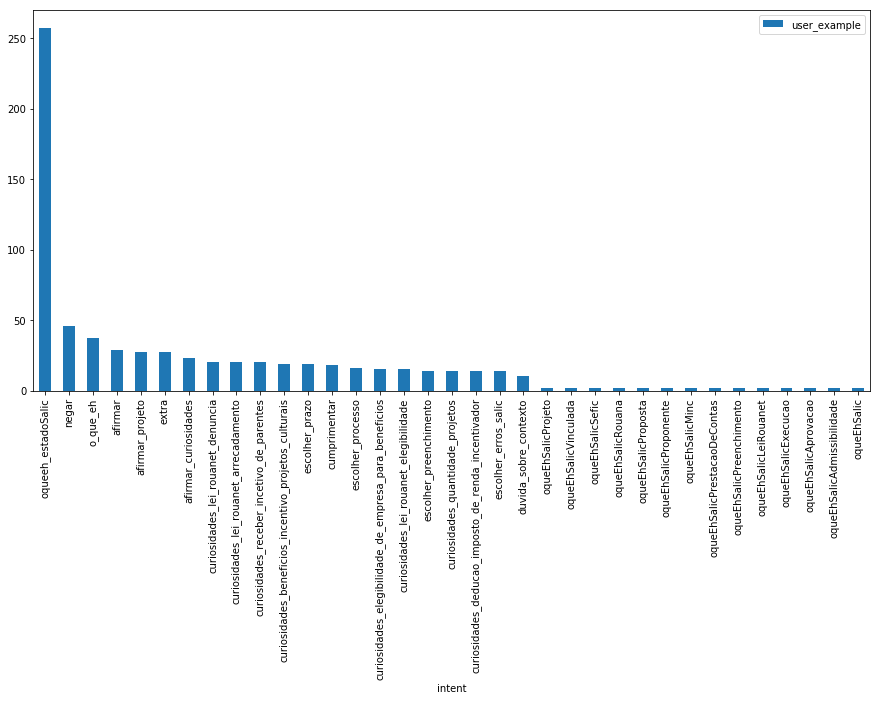

In [5]:
grouped_cc.plot.bar(figsize=(15,7))

### Conclusão 
Dataset de treino está desbalanceado. Tão desbalanceado que a principal intent (oqueeh_estadoSalic) possui mais exemplos de usuário que as 28 menores intents

In [6]:
grouped_cc[-28:].sum()

user_example    256
dtype: int64

#### Expandindo um pouco a análise
Podemos perceber que as 5 intents mais numerosas possuem 54% do dataset, enquanto as demais 23 intents possuem os 46% restantes

In [7]:
total_examples = grouped_cc.sum()
total_examples

user_example    702
dtype: int64

In [8]:
percent_top_5 = grouped_cc[:5].sum() / total_examples
print("total de user examples nas primeiras 5 intents: {0:.2f}%".format(percent_top_5[0]* 100))

total de user examples nas primeiras 5 intents: 56.41%


### Próximo passo: contar palavras mais presentes sem stop words no workspace inteiro

In [9]:
series_intent = df_cc['user_example']
strip_words = ''
for index, row in series_intent.iteritems():
    strip_words += row + ' '
clean_words = utils.remove_stop_words(strip_words)
word_count = Counter(clean_words.split(' '))
most_common = word_count.most_common(15)
most_common

[('estado', 196),
 ('sobre', 168),
 ('significa', 82),
 ('saber', 78),
 ('posso', 74),
 ('onde', 69),
 ('dúvida', 64),
 ('lei', 60),
 ('projetos', 43),
 ('pode', 29),
 ('projeto', 27),
 ('quero', 26),
 ('incentivar', 24),
 ('sei', 21),
 ('rouanet', 20)]

### Contar palavras sem stop words por intent

In [10]:
for intent in grouped_cc.index.values:
    print('Intent', intent,':')
    series_intent = df_cc.loc[df_cc['intent'] == intent]['user_example']
    strip_words = ''
    for index, row in series_intent.iteritems():
            strip_words += row + ' '
    clean_words = utils.remove_stop_words(strip_words)
    word_count = Counter(clean_words.split(' '))
    print(word_count.most_common(20))

Intent oqueeh_estadoSalic :
[('estado', 192), ('sobre', 128), ('significa', 65), ('dúvida', 64), ('onde', 64), ('posso', 64), ('saber', 64), ('[A14](estadoSalic)', 4), ('[A20](estadoSalic)', 4), ('[A23](estadoSalic)', 4), ('[B01](estadoSalic)', 4), ('[B14](estadoSalic)', 4), ('[A13](estadoSalic)', 4), ('[A16](estadoSalic)', 4), ('[A17](estadoSalic)', 4), ('[A42](estadoSalic)', 4), ('[B11](estadoSalic)', 4), ('[B20](estadoSalic)', 4), ('[C09](estadoSalic)', 4), ('[C10](estadoSalic)', 4)]
Intent negar :
[('sei', 17), ('nao', 11), ('quero', 9), ('ainda', 5), ('nada', 5), ('saber', 4), ('não', 3), ('preenchi', 3), ('nunca', 3), ('falar', 2), ('sobre', 2), ('não,', 2), ('fiz', 2), ('disso', 2), ('bem', 2), ('onde', 2), ('encaixa', 2), ('errado', 2), ('perguntar', 2), ('outra', 1)]
Intent o_que_eh :
[('pode', 8), ('explique', 6), ('explicar', 5), ('fase', 4), ('prestação', 4), ('contas', 4), ('preenchimento', 3), ('conceito', 3), ('cnic', 3), ('significa', 3), ('cnic?', 2), ('quer', 2), ('le

#### Checar quais das palavras mais presentes do dataset estão presentes nessas intents

In [11]:
for intent in grouped_cc.index.values:
    print('Intent', intent,':')
    series_intent = df_cc.loc[df_cc['intent'] == intent]['user_example']
    strip_words = ''
    for index, row in series_intent.iteritems():
            strip_words += row + ' '
    clean_words = utils.remove_stop_words(strip_words)
    word_count = Counter(clean_words.split(' '))
    for obj in most_common:
        print(obj[0]+':',word_count[obj[0]])

Intent oqueeh_estadoSalic :
estado: 192
sobre: 128
significa: 65
saber: 64
posso: 64
onde: 64
dúvida: 64
lei: 0
projetos: 0
pode: 0
projeto: 0
quero: 0
incentivar: 0
sei: 0
rouanet: 0
Intent negar :
estado: 0
sobre: 2
significa: 0
saber: 4
posso: 0
onde: 2
dúvida: 0
lei: 0
projetos: 0
pode: 0
projeto: 0
quero: 9
incentivar: 0
sei: 17
rouanet: 0
Intent o_que_eh :
estado: 1
sobre: 1
significa: 3
saber: 0
posso: 0
onde: 0
dúvida: 0
lei: 2
projetos: 0
pode: 8
projeto: 1
quero: 0
incentivar: 0
sei: 2
rouanet: 1
Intent afirmar :
estado: 0
sobre: 0
significa: 0
saber: 1
posso: 1
onde: 0
dúvida: 0
lei: 0
projetos: 0
pode: 1
projeto: 0
quero: 4
incentivar: 0
sei: 1
rouanet: 0
Intent afirmar_projeto :
estado: 0
sobre: 17
significa: 0
saber: 0
posso: 0
onde: 0
dúvida: 0
lei: 0
projetos: 12
pode: 0
projeto: 2
quero: 6
incentivar: 0
sei: 0
rouanet: 0
Intent extra :
estado: 0
sobre: 0
significa: 0
saber: 0
posso: 0
onde: 0
dúvida: 0
lei: 0
projetos: 0
pode: 0
projeto: 0
quero: 0
incentivar: 0
sei: 0